In [1]:
import numpy as np
import pandas as pd
from coactivation.process import *
from coactivation.visualize import *
import matplotlib.pyplot as plt

from scipy.stats import ks_2samp
from sklearn.cluster import KMeans


In [2]:
dfgt = generate_coactivation_by_gt()
dfgt

collected_data/2025_02_21
yz_static_resting.csv
om_wrist_movement_open.csv
yz_wrist_movement_relax.csv
mk_grasp_ball.csv
yz_wrist_movement_open.csv
om_arm_movement_relax.csv
yz_arm_movement_close.csv
om_static_reaching.csv
om_static_unsupported.csv
om_wrist_movement_close.csv
mk_wrist_movement_open.csv
om_grasp_soup.csv
yz_grasp_soup.csv
om_static_resting.csv
mk_arm_movement_close.csv
mk_static_resting.csv
yz_arm_movement_open.csv
mk_wrist_movement_relax.csv
mk_arm_movement_relax.csv
mk_static_unsupported.csv
yz_static_reaching.csv
om_static_hanging.csv
yz_static_hanging.csv
mk_wrist_movement_close.csv
mk_static_reaching.csv
mk_grasp_soup.csv
mk_arm_movement_open.csv
yz_wrist_movement_close.csv
yz_arm_movement_relax.csv
om_arm_movement_close.csv
om_arm_movement_open.csv
yz_static_unsupported.csv
yz_grasp_ball.csv
om_wrist_movement_relax.csv
om_grasp_ball.csv
mk_static_hanging.csv
collected_data/2025_02_07_hand_labeled
collected_data/2025_02_27
co_arm_movement_relax.csv
co_static_unsupp

,folder,subject_id,hand,set_num,subset,is_patient,gt,window,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
0,2025_02_21,yz,nan,static,static,False,0,0,0.007812,0.015625,0.015625,0.015625,0.007812,0.007812,0.007812,0.007812
1,2025_02_21,yz,nan,static,static,False,1,1,0.023438,0.062500,0.109375,0.031250,0.015625,0.023438,0.015625,0.015625
2,2025_02_21,yz,nan,static,static,False,2,2,0.093750,0.078125,0.070312,0.062500,0.015625,0.015625,0.023438,0.039062
3,2025_02_21,yz,nan,static,static,False,1,3,0.031250,0.062500,0.113281,0.039062,0.015625,0.023438,0.023438,0.023438
4,2025_02_21,yz,nan,static,static,False,0,4,0.015625,0.023438,0.023438,0.015625,0.007812,0.007812,0.007812,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,2025_02_07,bw,nan,grasp,grasp,False,0,4,0.031250,0.015625,0.023438,0.023438,0.015625,0.015625,0.015625,0.015625
1441,2025_02_07,bw,nan,grasp,grasp,False,2,5,0.218750,0.132812,0.164062,0.132812,0.046875,0.031250,0.039062,0.085938
1442,2025_02_07,bw,nan,grasp,grasp,False,0,6,0.039062,0.023438,0.046875,0.039062,0.015625,0.015625,0.015625,0.015625
1443,2025_02_07,jp,right,arm_movement,arm_movement,False,0,0,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625


In [3]:
df = generate_coactivation_dataset()
# high_acc = ['mk','co','xw'] # or bw or jp
low_acc = ['jh','ww','hl','wn']
df['accuracy'] = np.where(df.subject_id.isin(low_acc), 'low', 'high')
# df['accuracy'] = np.where(df.subject_id.isin(high_acc), 'high', df['accuracy'])
df

      gt  time_elapsed       current_time  current_task      emg0      emg1  \
0      0      0.027843  20250221161522878           NaN  0.007812  0.031250   
1      0      0.027946  20250221161522878           NaN  0.039062  0.015625   
2      0      0.031487  20250221161522882           NaN  0.000000  0.031250   
3      0      0.031584  20250221161522882           NaN  0.007812  0.015625   
4      0      0.038168  20250221161522889           NaN  0.015625  0.000000   
...   ..           ...                ...           ...       ...       ...   
9809   0     49.194954  20250221161612045           NaN  0.015625  0.000000   
9810   0     49.209509  20250221161612060           NaN  0.000000  0.000000   
9811   0     49.209688  20250221161612060           NaN  0.015625  0.007812   
9812   0     49.209798  20250221161612060           NaN  0.007812  0.039062   
9813   0     49.209830  20250221161612060           NaN  0.007812  0.062500   

          emg2      emg3      emg4      emg5      e

            value
gt emg           
0  emg0  0.015625
   emg1  0.023438
   emg2  0.015625
   emg3  0.015625
   emg4  0.007812
   emg5  0.007812
   emg6  0.007812
   emg7  0.007812
1  emg0  0.023438
   emg1  0.054688
   emg2  0.101562
   emg3  0.039062
   emg4  0.015625
   emg5  0.023438
   emg6  0.023438
   emg7  0.015625
2  emg0  0.101562
   emg1  0.085938
   emg2  0.078125
   emg3  0.062500
   emg4  0.015625
   emg5  0.015625
   emg6  0.023438
   emg7  0.046875
    gt   emg     value
0    0  emg0  0.015625
1    0  emg1  0.023438
2    0  emg2  0.015625
3    0  emg3  0.015625
4    0  emg4  0.007812
5    0  emg5  0.007812
6    0  emg6  0.007812
7    0  emg7  0.007812
8    1  emg0  0.023438
9    1  emg1  0.054688
10   1  emg2  0.101562
11   1  emg3  0.039062
12   1  emg4  0.015625
13   1  emg5  0.023438
14   1  emg6  0.023438
15   1  emg7  0.015625
16   2  emg0  0.101562
17   2  emg1  0.085938
18   2  emg2  0.078125
19   2  emg3  0.062500
20   2  emg4  0.015625
21   2  emg5  0.015625
22 

,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,gt1emg1,...,gt2emg5,gt2emg6,gt2emg7,folder,subject_id,hand,set_num,subset,is_patient,accuracy
0,0.015625,0.023438,0.015625,0.015625,0.007812,0.007812,0.007812,0.007812,0.023438,0.054688,...,0.015625,0.023438,0.046875,2025_02_21,yz,nan,static,resting,False,high
0,0.015625,0.039062,0.062500,0.117188,0.023438,0.015625,0.023438,0.015625,0.085938,0.054688,...,0.031250,0.054688,0.101562,2025_02_21,om,nan,static,reaching,False,high
0,0.015625,0.031250,0.054688,0.117188,0.031250,0.015625,0.015625,0.007812,0.062500,0.054688,...,0.046875,0.070312,0.117188,2025_02_21,om,nan,static,unsupported,False,high
0,0.015625,0.101562,0.140625,0.054688,0.015625,0.023438,0.078125,0.046875,0.085938,0.156250,...,0.039062,0.101562,0.117188,2025_02_21,om,nan,static,resting,False,high
0,0.007812,0.007812,0.015625,0.007812,0.007812,0.007812,0.007812,0.007812,0.046875,0.046875,...,0.023438,0.023438,0.031250,2025_02_21,mk,nan,static,resting,False,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.007812,0.007812,0.007812,0.015625,0.023438,0.015625,0.007812,0.007812,0.007812,0.023438,...,0.031250,0.031250,0.039062,2025_02_07,si,left,static,unsupported,False,high
0,0.007812,0.007812,0.015625,0.015625,0.007812,0.007812,0.007812,0.007812,0.015625,0.023438,...,0.015625,0.015625,0.015625,2025_02_07,si,left,static,resting,False,high
0,0.007812,0.007812,0.015625,0.023438,0.023438,0.015625,0.007812,0.007812,0.007812,0.031250,...,0.015625,0.023438,0.031250,2025_02_07,ls,nan,static,unsupported,False,high
0,0.023438,0.031250,0.031250,0.023438,0.023438,0.007812,0.015625,0.015625,0.054688,0.070312,...,0.023438,0.031250,0.062500,2025_02_07,bw,nan,static,hanging,False,high


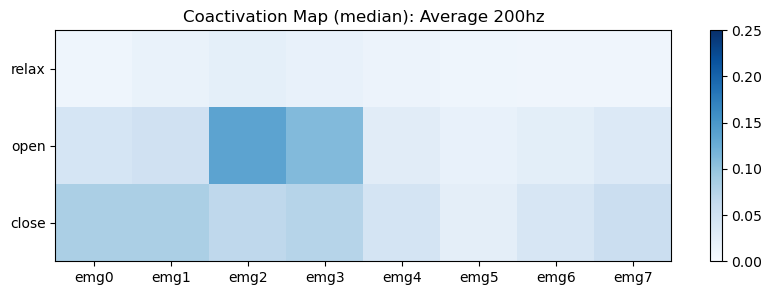

In [4]:
df_avg = mirror_left_right_emgs(df).iloc[:,:24].mean()
cm_avg = array_to_cm(df_avg.values)
plot_coactivation_map(cm_avg, title='Average 200hz')

# Intensity Analysis

max

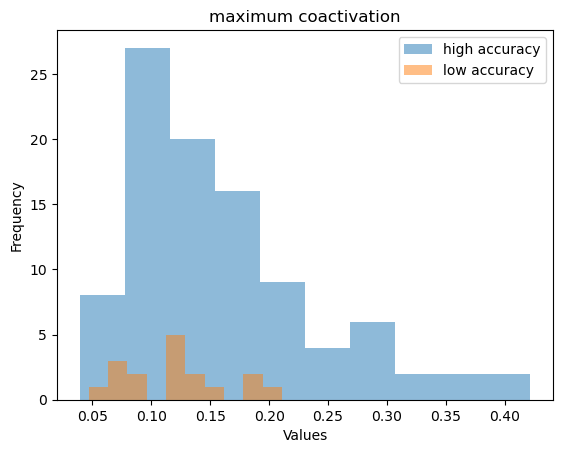

In [5]:
df['max'] = df.iloc[:,:24].max(axis=1)

plt.hist([df['max'][df.accuracy=='high']], stacked=False, bins=10, alpha=0.5)
plt.hist([df['max'][df.accuracy=='low']], stacked=False, bins=10, alpha=0.5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('maximum coactivation')
plt.legend(['high accuracy', 'low accuracy'])
plt.show()

In [6]:
ks_2samp(df['max'][df.accuracy=='high'].values, df['max'][df.accuracy=='low'].values)

KstestResult(statistic=0.2542892156862745, pvalue=0.25759592559753025, statistic_location=0.1328125, statistic_sign=-1)

mean

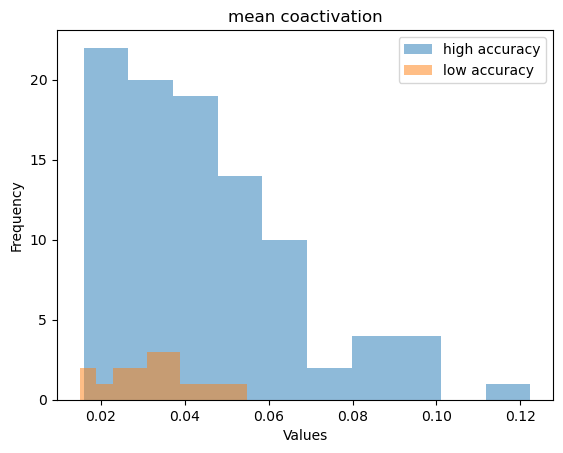

In [7]:
df['mean'] = df.iloc[:,:24].mean(axis=1)

plt.hist([df['mean'][df.accuracy=='high']], stacked=False, bins=10, alpha=0.5)
plt.hist([df['mean'][df.accuracy=='low']], stacked=False, bins=10, alpha=0.5)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('mean coactivation')
plt.legend(['high accuracy', 'low accuracy'])
plt.show()

In [8]:
ks_2samp(df['mean'][df.accuracy=='high'].values, df['mean'][df.accuracy=='low'].values)

KstestResult(statistic=0.3443627450980392, pvalue=0.049565936132290454, statistic_location=0.039713541666666664, statistic_sign=-1)

# MI

In [9]:
df

,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,gt1emg1,...,gt2emg7,folder,subject_id,hand,set_num,subset,is_patient,accuracy,max,mean
0,0.015625,0.023438,0.015625,0.015625,0.007812,0.007812,0.007812,0.007812,0.023438,0.054688,...,0.046875,2025_02_21,yz,nan,static,resting,False,high,0.101562,0.034505
0,0.015625,0.039062,0.062500,0.117188,0.023438,0.015625,0.023438,0.015625,0.085938,0.054688,...,0.101562,2025_02_21,om,nan,static,reaching,False,high,0.304688,0.083333
0,0.015625,0.031250,0.054688,0.117188,0.031250,0.015625,0.015625,0.007812,0.062500,0.054688,...,0.117188,2025_02_21,om,nan,static,unsupported,False,high,0.398438,0.096029
0,0.015625,0.101562,0.140625,0.054688,0.015625,0.023438,0.078125,0.046875,0.085938,0.156250,...,0.117188,2025_02_21,om,nan,static,resting,False,high,0.367188,0.122396
0,0.007812,0.007812,0.015625,0.007812,0.007812,0.007812,0.007812,0.007812,0.046875,0.046875,...,0.031250,2025_02_21,mk,nan,static,resting,False,high,0.195312,0.044596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.007812,0.007812,0.007812,0.015625,0.023438,0.015625,0.007812,0.007812,0.007812,0.023438,...,0.039062,2025_02_07,si,left,static,unsupported,False,high,0.078125,0.028646
0,0.007812,0.007812,0.015625,0.015625,0.007812,0.007812,0.007812,0.007812,0.015625,0.023438,...,0.015625,2025_02_07,si,left,static,resting,False,high,0.078125,0.020182
0,0.007812,0.007812,0.015625,0.023438,0.023438,0.015625,0.007812,0.007812,0.007812,0.031250,...,0.031250,2025_02_07,ls,nan,static,unsupported,False,high,0.085938,0.025065
0,0.023438,0.031250,0.031250,0.023438,0.023438,0.007812,0.015625,0.015625,0.054688,0.070312,...,0.062500,2025_02_07,bw,nan,static,hanging,False,high,0.164062,0.050130


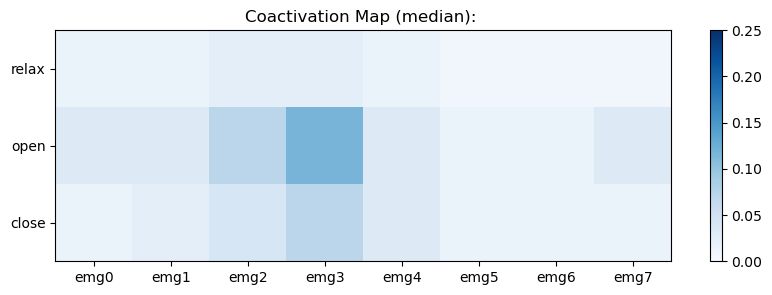

In [10]:
plot_coactivation_map(array_to_cm(df[(df.subject_id=='jh')&(df.subset=='resting')].iloc[:,:24].values))

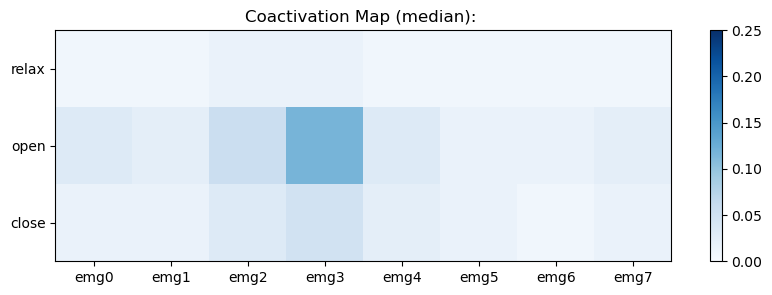

In [11]:
plot_coactivation_map(array_to_cm(df[(df.subject_id=='jh')&(df.subset=='reaching')].iloc[:,:24].values))

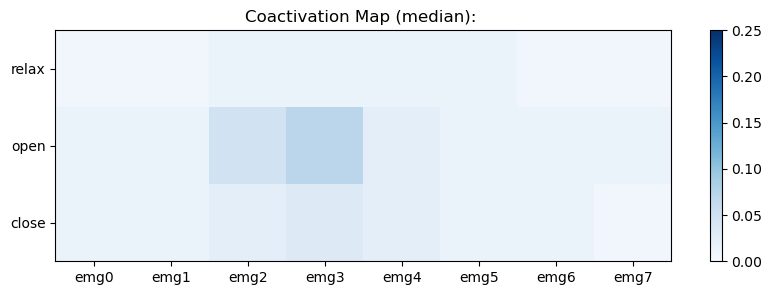

In [12]:
plot_coactivation_map(array_to_cm(df[(df.subject_id=='jh')&(df.subset=='unsupported')].iloc[:,:24].values))

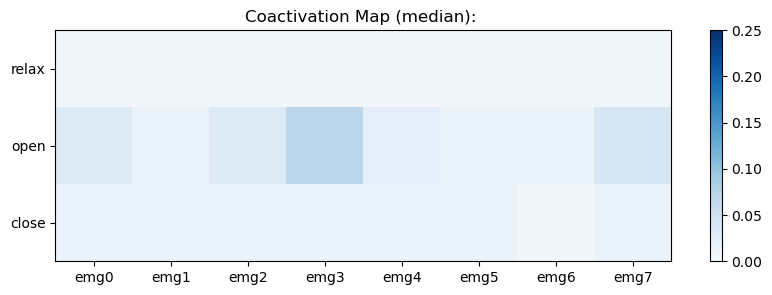

In [13]:
plot_coactivation_map(array_to_cm(df[(df.subject_id=='jh')&(df.subset=='hanging')].iloc[:,:24].values))

In [14]:
def gradient(arr):
    grad = np.empty_like(arr)
    grad[:-1] = np.diff(arr)
    grad[-1] = arr[0]-arr[-1]
    return grad

def mi(x, y, bins=8):
    def entropy(arr):
        vals, counts = np.unique(arr, return_counts=True)
        p = counts / counts.sum()
        return -np.sum(p * np.log2(p))
    def joint_entropy(a, b):
        pairs = np.column_stack((a, b))
        unique_pairs, counts = np.unique(pairs, axis=0, return_counts=True)
        p = counts / counts.sum()
        return -np.sum(p * np.log2(p))
    return entropy(x) + entropy(y) - joint_entropy(x, y)
    # # compute joint histogram
    # hist_2d, x_edges, y_edges = np.histogram2d(x, y, bins=bins)
    # # normalize
    # pxy = hist_2d / float(np.sum(hist_2d))
    # px = np.sum(pxy, axis=1)
    # py = np.sum(pxy, axis=0)
    # px_py = np.outer(px, py)
    # nonzero = pxy > 0
    # mi = np.sum(pxy[nonzero] * np.log(pxy[nonzero] / px_py[nonzero]))
    # return mi

def g(x, y):
    gradx = gradient(x)
    grady = gradient(y)
    G = 0
    for i in range(len(x)):
        alpha = np.arccos(np.dot(gradx[i], grady[i]) / (abs(gradx[i]) * abs(grady[i])))
        if alpha!=alpha:
            alpha=0
        w = (np.cos(2*alpha)+1)/2
        G += w * min(abs(gradx[i]), abs(grady[i]))
    return G

def gmi(cm1, cm2, bins=8):
    values=[]
    for i in range(3):
        G = g(cm1.iloc[i,:].values, cm2.iloc[i,:].values)
        I = mi(cm1.iloc[i,:].values, cm2.iloc[i,:].values, bins)
        values.append(G*I)
    return values, np.mean(values)

def mi_cm(cm1, cm2, bins=10):
    values=[]
    for i in range(3):
        I = mi(cm1.iloc[i,:].values, cm2.iloc[i,:].values, bins)
        values.append(I)
    return values, np.mean(values)

def g_cm(cm1, cm2):
    values=[]
    for i in range(3):
        G = g(cm1.iloc[i,:].values, cm2.iloc[i,:].values)
        values.append(G)
    return values, np.mean(values)

In [15]:
df.iloc[:, :24]

,gt0emg0,gt0emg1,gt0emg2,gt0emg3,gt0emg4,gt0emg5,gt0emg6,gt0emg7,gt1emg0,gt1emg1,...,gt1emg6,gt1emg7,gt2emg0,gt2emg1,gt2emg2,gt2emg3,gt2emg4,gt2emg5,gt2emg6,gt2emg7
0,0.015625,0.023438,0.015625,0.015625,0.007812,0.007812,0.007812,0.007812,0.023438,0.054688,...,0.023438,0.015625,0.101562,0.085938,0.078125,0.062500,0.015625,0.015625,0.023438,0.046875
0,0.015625,0.039062,0.062500,0.117188,0.023438,0.015625,0.023438,0.015625,0.085938,0.054688,...,0.039062,0.054688,0.156250,0.164062,0.093750,0.234375,0.085938,0.031250,0.054688,0.101562
0,0.015625,0.031250,0.054688,0.117188,0.031250,0.015625,0.015625,0.007812,0.062500,0.054688,...,0.031250,0.046875,0.242188,0.242188,0.101562,0.242188,0.117188,0.046875,0.070312,0.117188
0,0.015625,0.101562,0.140625,0.054688,0.015625,0.023438,0.078125,0.046875,0.085938,0.156250,...,0.109375,0.109375,0.250000,0.164062,0.187500,0.265625,0.078125,0.039062,0.101562,0.117188
0,0.007812,0.007812,0.015625,0.007812,0.007812,0.007812,0.007812,0.007812,0.046875,0.046875,...,0.031250,0.023438,0.085938,0.101562,0.054688,0.054688,0.062500,0.023438,0.023438,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.007812,0.007812,0.007812,0.015625,0.023438,0.015625,0.007812,0.007812,0.007812,0.023438,...,0.015625,0.007812,0.039062,0.031250,0.031250,0.062500,0.062500,0.031250,0.031250,0.039062
0,0.007812,0.007812,0.015625,0.015625,0.007812,0.007812,0.007812,0.007812,0.015625,0.023438,...,0.015625,0.007812,0.023438,0.015625,0.023438,0.031250,0.023438,0.015625,0.015625,0.015625
0,0.007812,0.007812,0.015625,0.023438,0.023438,0.015625,0.007812,0.007812,0.007812,0.031250,...,0.007812,0.007812,0.023438,0.031250,0.031250,0.054688,0.031250,0.015625,0.023438,0.031250
0,0.023438,0.031250,0.031250,0.023438,0.023438,0.007812,0.015625,0.015625,0.054688,0.070312,...,0.031250,0.062500,0.109375,0.093750,0.085938,0.070312,0.031250,0.023438,0.031250,0.062500


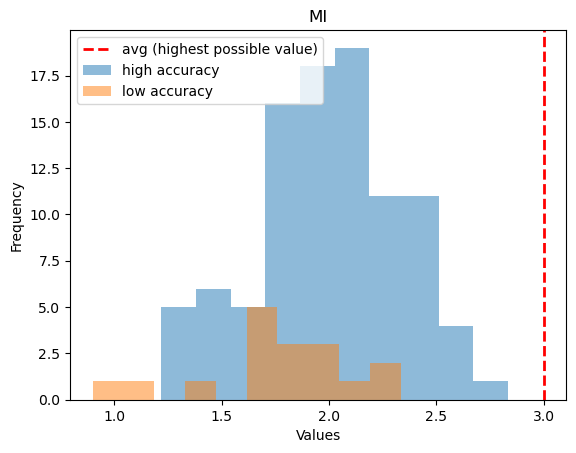

In [16]:
def apply_mi(x):
    return (mi_cm(array_to_cm(x.values), cm_avg)[1])

df['mi'] = df.iloc[:, :24].apply(apply_mi, axis=1) 


plt.axvline(x=mi_cm(cm_avg, cm_avg)[1], color='r', linestyle='--', linewidth=2, label='avg (highest possible value)')
# plt.hist([df.mi[df.accuracy=='high'], df.mi[df.accuracy=='med'], df.mi[df.accuracy=='low']], bins=10, stacked=True)
plt.hist([df.mi[df.accuracy=='high']], stacked=False, bins=10, alpha=0.5, label ='high accuracy')
# plt.hist([df.mi[df.accuracy=='med']], stacked=False, bins=10, alpha=0.5)
plt.hist([df.mi[df.accuracy=='low']], stacked=False, bins=10, alpha=0.5, label = 'low accuracy')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('MI')
plt.legend()
plt.show()

In [17]:
mi_cm(cm_avg, cm_avg)

([3.0, 3.0, 3.0], 3.0)

In [18]:
ks_2samp(df.mi[df.accuracy=='high'].values, df.mi[df.accuracy=='low'].values)

KstestResult(statistic=0.3547794117647059, pvalue=0.039580388480587675, statistic_location=1.9889723955628995, statistic_sign=-1)

/var/folders/yd/vqpl9gqn5nqfzr41g9_g0t940000gq/T/ipykernel_30327/1314576870.py:34: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.arccos(np.dot(gradx[i], grady[i]) / (abs(gradx[i]) * abs(grady[i])))


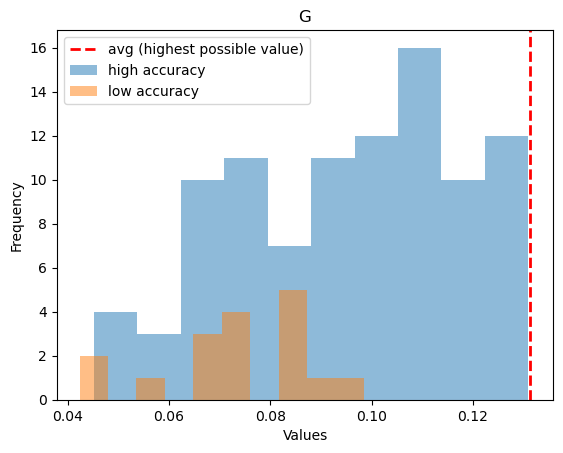

In [19]:
def apply_g(x):
    return (g_cm(array_to_cm(x.values), cm_avg)[1])

df['g'] = df.iloc[:, :24].apply(apply_g, axis=1) 
plt.axvline(x=g_cm(cm_avg, cm_avg)[1], color='r', linestyle='--', linewidth=2, label='avg (highest possible value)')
# plt.hist([df.g[df.accuracy=='high'], df.g[df.accuracy=='low']], bins=10, stacked=True)
plt.hist([df.g[df.accuracy=='high']], stacked=False, bins=10, alpha=0.5, label='high accuracy')
# plt.hist([df.g[df.accuracy=='med']], stacked=False, bins=10, alpha=0.5)
plt.hist([df.g[df.accuracy=='low']], stacked=False, bins=10, alpha=0.5, label='low accuracy')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('G')
plt.legend()
plt.show()

In [20]:
ks_2samp(df.g[df.accuracy=='high'].values, df.g[df.accuracy=='low'].values)

KstestResult(statistic=0.5661764705882353, pvalue=7.606274917585748e-05, statistic_location=0.08976308997050146, statistic_sign=-1)

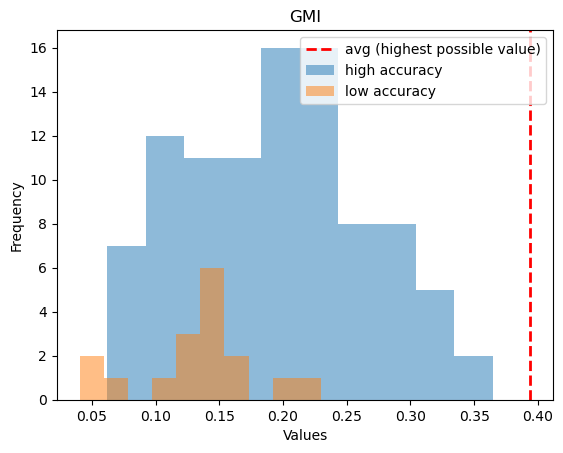

In [21]:
df['gmi'] = df.g*df.mi
# plt.hist([df.gmi[df.accuracy=='high'], df.gmi[df.accuracy=='low']], stacked=True, bins=10, alpha=0.5)

plt.axvline(x=gmi(cm_avg, cm_avg)[1], color='r', linestyle='--', linewidth=2, label='avg (highest possible value)')

plt.hist([df.gmi[df.accuracy=='high']], stacked=False, bins=10, alpha=0.5, label='high accuracy')
# plt.hist([df.g[df.accuracy=='med']], stacked=False, bins=10, alpha=0.5)
plt.hist([df.gmi[df.accuracy=='low']], stacked=False, bins=10, alpha=0.5, label='low accuracy')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('GMI')
plt.legend()
plt.show()

In [22]:
ks_2samp(df.gmi[df.accuracy=='high'].values, df.gmi[df.accuracy=='low'].values)

KstestResult(statistic=0.5490196078431373, pvalue=0.00014467737795561213, statistic_location=0.1634329156614011, statistic_sign=-1)

# Clustering

In [23]:
X = df.iloc[:, :24].values
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

In [24]:
df.cluster.value_counts()

cluster
0    70
1    34
2     9
Name: count, dtype: int64

In [25]:
df[df.cluster==2].iloc[:,25:]

,subject_id,hand,set_num,subset,is_patient,accuracy,max,mean,mi,g,gmi,cluster
0,om,nan,static,reaching,False,high,0.304688,0.083333,2.635213,0.130808,0.344706,2
0,om,nan,static,unsupported,False,high,0.398438,0.096029,2.353759,0.130957,0.308242,2
0,om,nan,static,resting,False,high,0.367188,0.122396,2.833333,0.128641,0.364483,2
0,om,nan,static,hanging,False,high,0.304688,0.094238,2.468546,0.127812,0.315509,2
0,hh,nan,static,unsupported,False,high,0.289062,0.082682,2.353759,0.126233,0.297122,2
0,ec,right,static,resting,False,high,0.328125,0.088542,2.218546,0.110585,0.245338,2
0,ec,right,static,reaching,False,high,0.421875,0.095052,2.500000,0.128203,0.320508,2
0,ec,right,static,unsupported,False,high,0.304688,0.089518,2.551880,0.127996,0.326630,2
0,ec,right,static,hanging,False,high,0.328125,0.090820,2.181188,0.125576,0.273905,2


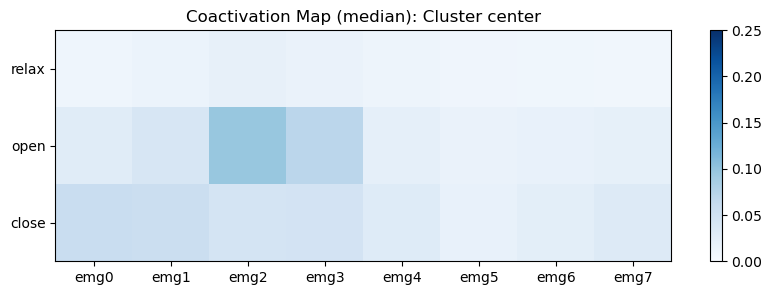

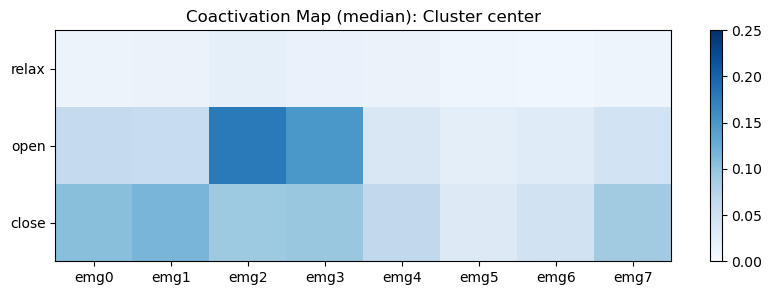

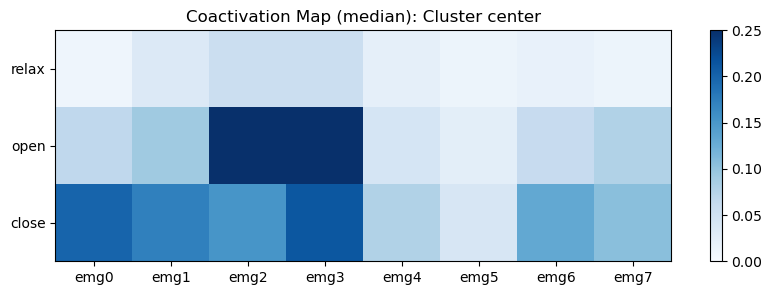

In [26]:
for cluster_center in kmeans.cluster_centers_:
    cm = array_to_cm(cluster_center)
    plot_coactivation_map(cm, title='Cluster center')
    plt.show()

In [27]:
pd.crosstab(df['cluster'], df['accuracy'])

accuracy,high,low
cluster,,
0,55,15
1,32,2
2,9,0


normalized

In [28]:
X = df.iloc[:, :24].divide(df['max'].values, axis=0)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

df['cluster2'] = kmeans.labels_

In [29]:
df.cluster.value_counts()

cluster
0    70
1    34
2     9
Name: count, dtype: int64

In [30]:
df[df.cluster2==2].iloc[:,25:]

,subject_id,hand,set_num,subset,is_patient,accuracy,max,mean,mi,g,gmi,cluster,cluster2
0,yz,nan,static,reaching,False,high,0.093750,0.025716,1.921904,0.073228,0.140737,0,2
0,yz,nan,static,unsupported,False,high,0.078125,0.023926,1.932932,0.076915,0.148672,0,2
0,hl,nan,static,unsupported,False,low,0.148438,0.034831,1.635213,0.074461,0.121759,0,2
0,hl,nan,static_unsupported,2,False,low,0.210938,0.038737,1.681188,0.089763,0.150909,0,2
0,zc,nan,static,resting,False,high,0.167969,0.040853,2.103759,0.114295,0.240450,0,2
0,hl,nan,static,hanging,False,low,0.132812,0.033203,1.905639,0.069886,0.133178,0,2
0,wn,nan,static,resting,False,low,0.179688,0.054850,2.333333,0.098486,0.229800,1,2
0,ml,nan,static,hanging,False,high,0.250000,0.060872,2.103759,0.119780,0.251989,1,2
0,ml,nan,static,reaching,False,high,0.203125,0.056966,2.270426,0.122039,0.277080,1,2
0,ml,nan,static,unsupported,False,high,0.210938,0.056803,2.040852,0.113489,0.231614,1,2


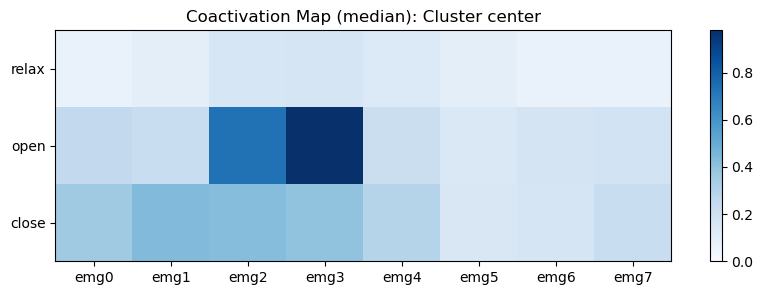

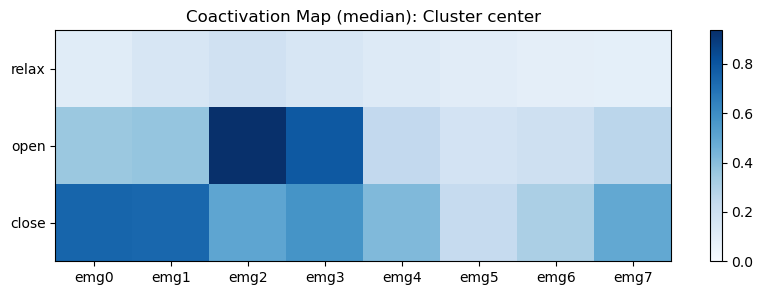

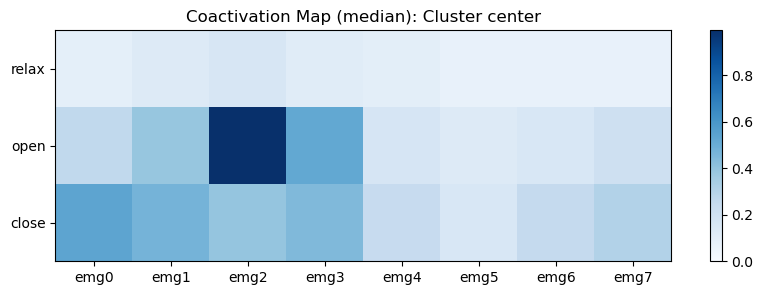

In [31]:
for cluster_center in kmeans.cluster_centers_:
    cm = array_to_cm(cluster_center)
    plot_coactivation_map(cm, title='Cluster center', vmax=1)
    plt.show()

In [32]:
pd.crosstab(df['cluster2'], df['accuracy'])

accuracy,high,low
cluster2,,
0,22,4
1,38,4
2,36,9


In [33]:
cm

,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.092889,0.125764,0.159284,0.114624,0.099951,0.076039,0.073227,0.074931
1,0.260927,0.388479,0.994152,0.522911,0.166521,0.124708,0.153773,0.206208
2,0.537728,0.471681,0.395501,0.444984,0.241102,0.151717,0.251474,0.309880


       gt  time_elapsed       current_time  current_task  motor_position  \
0       0      0.011294  20250401112502328           NaN              -3   
1       0      0.011728  20250401112502329           NaN              -3   
2       0      0.026433  20250401112502344           NaN              -3   
3       0      0.026532  20250401112502344           NaN              -3   
4       0      0.027164  20250401112502344           NaN              -3   
...    ..           ...                ...           ...             ...   
11053   0     55.413636  20250401112557731           NaN              -3   
11054   0     55.428612  20250401112557746           NaN              -3   
11055   0     55.428730  20250401112557746           NaN              -3   
11056   0     55.436139  20250401112557753           NaN              -3   
11057   0     55.436250  20250401112557753           NaN              -3   

           emg0      emg1      emg2      emg3      emg4      emg5      emg6  \
0      0

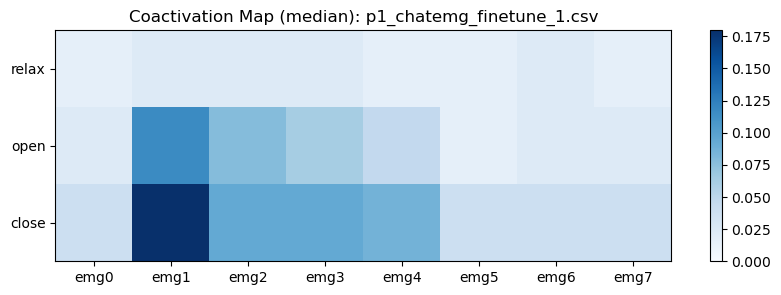

In [34]:
df1 = preprocess_emgs('collected_data/2025_04_01/p1_chatemg_finetune_1.csv', hz=200)
cm = get_coactivation_map(df1)
plot_coactivation_map(cm, vmax = np.max(cm.values), title = 'p1_chatemg_finetune_1.csv')

,gt,time_elapsed,current_time,current_task,trakstar0,trakstar1,trakstar2,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg_timer_stamp,hand_open_flag,motor_position,futek
0,0,0.005298,20250401112642589,NaN,translation: \n x: -0.34457431640624997\n y:...,translation: \n x: -0.310306640625\n y: 0.08...,translation: \n x: -0.37058203125\n y: 0.031...,0.046875,0.015625,0.023438,0.015625,0.023438,0.007812,0.000000,0.039062,1743521202588734865,NaN,NaN,NaN
1,0,0.005644,20250401112642589,NaN,translation: \n x: -0.34457431640624997\n y:...,translation: \n x: -0.310306640625\n y: 0.08...,translation: \n x: -0.37058203125\n y: 0.031...,0.000000,0.023438,0.000000,0.015625,0.007812,0.007812,0.039062,0.015625,1743521202588850736,NaN,NaN,NaN
2,0,0.019728,20250401112642603,NaN,translation: \n x: -0.34457431640624997\n y:...,translation: \n x: -0.310306640625\n y: 0.08...,translation: \n x: -0.37058203125\n y: 0.031...,0.054688,0.031250,0.023438,0.000000,0.007812,0.007812,0.000000,0.015625,1743521202603760719,False,-2.0,27.901043
3,0,0.019783,20250401112642603,NaN,translation: \n x: -0.34457431640624997\n y:...,translation: \n x: -0.310306640625\n y: 0.08...,translation: \n x: -0.37058203125\n y: 0.031...,0.007812,0.015625,0.000000,0.015625,0.000000,0.007812,0.000000,0.015625,1743521202603855133,False,-2.0,27.901043
4,0,0.027298,20250401112642611,NaN,translation: \n x: -0.34457431640624997\n y:...,translation: \n x: -0.310306640625\n y: 0.08...,translation: \n x: -0.37058203125\n y: 0.031...,0.023438,0.023438,0.015625,0.031250,0.031250,0.000000,0.000000,0.007812,1743521202611287355,False,-2.0,27.901043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10439,0,52.334296,20250401112734918,NaN,translation: \n x: -0.3181201171875\n y: 0.0...,translation: \n x: -0.27882949218749997\n y:...,translation: \n x: -0.33943974609375\n y: -0...,0.062500,0.039062,0.023438,0.031250,0.015625,0.000000,0.031250,0.015625,1743521254918278694,False,1.0,28.188683
10440,0,52.347804,20250401112734931,NaN,translation: \n x: -0.3181201171875\n y: 0.0...,translation: \n x: -0.27882949218749997\n y:...,translation: \n x: -0.33943974609375\n y: -0...,0.023438,0.046875,0.054688,0.078125,0.054688,0.000000,0.015625,0.031250,1743521254931757211,False,1.0,28.188683
10441,0,52.347898,20250401112734932,NaN,translation: \n x: -0.3181201171875\n y: 0.0...,translation: \n x: -0.27882949218749997\n y:...,translation: \n x: -0.33943974609375\n y: -0...,0.015625,0.015625,0.000000,0.023438,0.015625,0.023438,0.023438,0.007812,1743521254931860923,False,1.0,28.188683
10442,0,52.355398,20250401112734939,NaN,translation: \n x: -0.3181201171875\n y: 0.0...,translation: \n x: -0.27882949218749997\n y:...,translation: \n x: -0.33943974609375\n y: -0...,0.070312,0.031250,0.015625,0.000000,0.015625,0.023438,0.054688,0.070312,1743521254939306735,False,1.0,28.188683


,gt,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
0,0,0.046875,0.015625,0.023438,0.015625,0.023438,0.007812,0.000000,0.039062
1,0,0.000000,0.023438,0.000000,0.015625,0.007812,0.007812,0.039062,0.015625
2,0,0.054688,0.031250,0.023438,0.000000,0.007812,0.007812,0.000000,0.015625
3,0,0.007812,0.015625,0.000000,0.015625,0.000000,0.007812,0.000000,0.015625
4,0,0.023438,0.023438,0.015625,0.031250,0.031250,0.000000,0.000000,0.007812
...,...,...,...,...,...,...,...,...,...
10439,0,0.062500,0.039062,0.023438,0.031250,0.015625,0.000000,0.031250,0.015625
10440,0,0.023438,0.046875,0.054688,0.078125,0.054688,0.000000,0.015625,0.031250
10441,0,0.015625,0.015625,0.000000,0.023438,0.015625,0.023438,0.023438,0.007812
10442,0,0.070312,0.031250,0.015625,0.000000,0.015625,0.023438,0.054688,0.070312


,gt,emg,value
0,0,emg0,0.046875
1,0,emg0,0.000000
2,0,emg0,0.054688
3,0,emg0,0.007812
4,0,emg0,0.023438
...,...,...,...
83547,0,emg7,0.015625
83548,0,emg7,0.031250
83549,0,emg7,0.007812
83550,0,emg7,0.070312


value
gt emg           
0  emg0  0.015625
   emg1  0.023438
   emg2  0.015625
   emg3  0.015625
   emg4  0.015625
   emg5  0.015625
   emg6  0.023438
   emg7  0.023438
1  emg0  0.023438
   emg1  0.093750
   emg2  0.054688
   emg3  0.039062
   emg4  0.023438
   emg5  0.015625
   emg6  0.023438
   emg7  0.023438
2  emg0  0.031250
   emg1  0.093750
   emg2  0.062500
   emg3  0.054688
   emg4  0.046875
   emg5  0.023438
   emg6  0.031250
   emg7  0.039062

,gt,emg,value
0,0,emg0,0.015625
1,0,emg1,0.023438
2,0,emg2,0.015625
3,0,emg3,0.015625
4,0,emg4,0.015625
5,0,emg5,0.015625
6,0,emg6,0.023438
7,0,emg7,0.023438
8,1,emg0,0.023438
9,1,emg1,0.093750


emg,emg0,emg1,emg2,emg3,emg4,emg5,emg6,emg7
gt,,,,,,,,
0,0.015625,0.023438,0.015625,0.015625,0.015625,0.015625,0.023438,0.023438
1,0.023438,0.093750,0.054688,0.039062,0.023438,0.015625,0.023438,0.023438
2,0.031250,0.093750,0.062500,0.054688,0.046875,0.023438,0.031250,0.039062


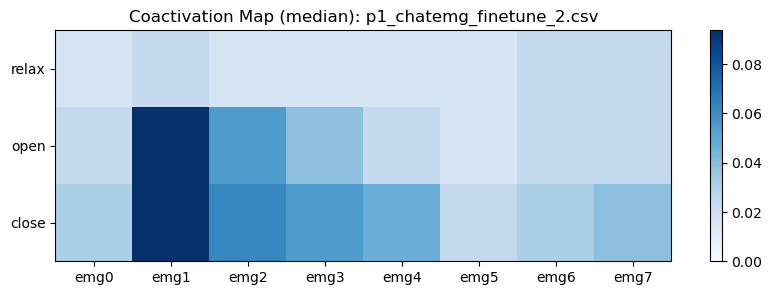

In [2]:
df1 = preprocess_emgs('collected_data/2025_04_01/p1_chatemg_finetune_2.csv', hz=200)
cm = get_coactivation_map(df1)
plot_coactivation_map(cm, vmax = np.max(cm.values), title='p1_chatemg_finetune_2.csv')